In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="9tM60PjNko69BHRZdXPv")
project = rf.workspace("a-eckfh").project("soil-type-identification")
version = project.version(1)
dataset = version.download("folder")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.8
    Uninstalling idna-3.8:
      Successfully uninstalled idna-3.8
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Soil-Type-Identification-1 in folder:: 100%|██████████| 4222/4222 [00:01<00:00, 2784.20it/s]


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [3]:
# Define directories
train_dir = '/content/Soil-Type-Identification-1/train'
val_dir = '/content/Soil-Type-Identification-1/valid'

# Image dimensions and batch size
img_height, img_width = 224, 224
batch_size = 32

In [5]:
# Data Augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data Generator for validation set (No augmentation)
val_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
# Train data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Validation data generator
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 3570 images belonging to 5 classes.
Found 428 images belonging to 5 classes.


In [7]:
# Load the InceptionV3 model with pre-trained ImageNet weights
base_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Unfreeze the last 10 layers
for layer in base_model.layers[:-10]:
    layer.trainable = False

# Add custom layers on top of InceptionV3
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling
x = Dense(1024, activation='relu')(x)  # Fully connected layer
predictions = Dense(5, activation='softmax')(x)  # 5 classes for soil classification

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
# Train the model
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=val_generator.samples // batch_size
)

Epoch 1/25


Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.


111/111 ━━━━━━━━━━━━━━━━━━━━ 81s 549ms/step - accuracy: 0.5932 - loss: 1.1300 - val_accuracy: 0.8558 - val_loss: 0.5227
Epoch 2/25
  1/111 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - accuracy: 0.9062 - loss: 0.4441

Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.


111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9062 - loss: 0.4441 - val_accuracy: 0.8333 - val_loss: 0.4150
Epoch 3/25
111/111 ━━━━━━━━━━━━━━━━━━━━ 50s 422ms/step - accuracy: 0.8194 - loss: 0.5273 - val_accuracy: 0.8774 - val_loss: 0.3869
Epoch 4/25
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7812 - loss: 0.5169 - val_accuracy: 0.9167 - val_loss: 0.2346
Epoch 5/25
111/111 ━━━━━━━━━━━━━━━━━━━━ 50s 423ms/step - accuracy: 0.8558 - loss: 0.4208 - val_accuracy: 0.8750 - val_loss: 0.3378
Epoch 6/25
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7500 - loss: 0.5415 - val_accuracy: 0.9167 - val_loss: 0.1622
Epoch 7/25
111/111 ━━━━━━━━━━━━━━━━━━━━ 91s 510ms/step - accuracy: 0.8818 - loss: 0.3407 - val_accuracy: 0.8966 - val_loss: 0.3183
Epoch 8/25
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - accuracy: 0.9688 - loss: 0.2965 - val_accuracy: 0.8333 - val_loss: 0.4959
Epoch 9/25
111/111 ━━━━━━━━━━━━━━━━━━━━ 74s 441ms/step - accuracy: 0.8804 - loss: 0.3407 - val_accuracy

In [9]:
# Save the trained model
model.save('soil_classification_inceptionv3.h5')

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files

# Load the trained model
model = load_model('soil_classification_inceptionv3.h5')

# Set the path to your training data to extract class names (same as in training)
train_dir = '/content/Soil-Type-Identification-1/train'

# Image size and batch size should match what was used during training
img_height, img_width = 224, 224
batch_size = 32

# Recreate the data generator to access class names
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Extract class indices and class names from the generator
class_names = list(train_generator.class_indices.keys())



Found 3570 images belonging to 5 classes.


Saving Black_Soil_-11-_original_rotated90_jpg.rf.a46761fac947f4dde313cae65122e0a6.jpg to Black_Soil_-11-_original_rotated90_jpg.rf.a46761fac947f4dde313cae65122e0a6.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


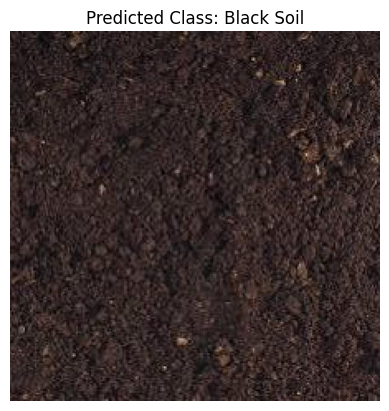

In [14]:
# Function to preprocess the image for prediction
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.convert('RGB')  # Ensure image is in RGB format
    img = img.resize((224, 224))  # Resize to match the model's input size
    img = np.array(img) / 255.0  # Normalize the pixel values (0-1)
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Upload an image
uploaded = files.upload()

for file_name in uploaded.keys():
    # Preprocess the uploaded image
    preprocessed_img = preprocess_image(file_name)

    # Predict the class of the image
    prediction = model.predict(preprocessed_img)
    predicted_class = np.argmax(prediction, axis=1)

    # Display the image and prediction
    plt.imshow(Image.open(file_name))
    plt.title(f"Predicted Class: {class_names[predicted_class[0]]}")
    plt.axis('off')
    plt.show()